# unsafe.Pointer usage survey



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import json
from datetime import datetime

In [2]:
MATCH_TYPES = (
    'unsafe.Pointer', 'unsafe.Sizeof', 'unsafe.Alignof', 'unsafe.Offsetof',
    'uintptr', 'reflect.SliceHeader', 'reflect.StringHeader'
)

## Analyse von Projektdaten

In [3]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S %z %Z')

projects_df = pd.read_csv('/home/johannes/studium/s14/masterarbeit/code/data-survey/data/projects.csv',
                         parse_dates=['project_created_at', 'project_last_pushed_at', 'project_updated_at'],
                         date_parser=dateparse)

In [4]:
projects_df[:5]

,project_rank,project_name,project_github_clone_url,project_number_of_stars,project_number_of_forks,project_github_id,project_created_at,project_last_pushed_at,project_updated_at,project_size,project_checkout_path
0,1,golang/go,https://github.com/golang/go.git,71169,10164,23096959,2014-08-19 04:33:40+00:00,2020-04-13 10:27:46+00:00,2020-04-13 11:58:18+00:00,209324,/home/johannes/studium/s14/masterarbeit/downlo...
1,2,kubernetes/kubernetes,https://github.com/kubernetes/kubernetes.git,64968,23144,20580498,2014-06-06 22:56:04+00:00,2020-04-13 11:53:02+00:00,2020-04-13 11:17:13+00:00,909251,/home/johannes/studium/s14/masterarbeit/downlo...
2,3,moby/moby,https://github.com/moby/moby.git,56804,16416,7691631,2013-01-18 18:10:57+00:00,2020-04-12 15:23:23+00:00,2020-04-13 12:00:24+00:00,152827,/home/johannes/studium/s14/masterarbeit/downlo...
3,4,avelino/awesome-go,https://github.com/avelino/awesome-go.git,53411,7088,21540759,2014-07-06 13:42:15+00:00,2020-04-13 09:42:24+00:00,2020-04-13 11:56:14+00:00,8027,/home/johannes/studium/s14/masterarbeit/downlo...
4,5,gohugoio/hugo,https://github.com/gohugoio/hugo.git,43140,4900,11180687,2013-07-04 15:26:26+00:00,2020-04-12 19:12:47+00:00,2020-04-13 11:52:14+00:00,86013,/home/johannes/studium/s14/masterarbeit/downlo...


## Analyse von Match Daten

In [5]:
matches_df = pd.read_csv('/home/johannes/studium/s14/masterarbeit/code/data-survey/backup-data/unsafe_matches_2.csv')\
    .fillna("") # fill module_version field

In [6]:
matches_df

,project_name,module_import_path,module_registry,module_version,module_number_go_files,file_name,file_size_bytes,file_size_lines,file_imports_unsage_pkg,file_go_vet_output,text,context,line_number,byte_offset,match_type
0,kubernetes/kubernetes,github.com/Azure/go-ansiterm,github.com,,22,winterm/api.go,12469,327,True,NOT-RUN,"\tr1, r2, err := getConsoleCursorInfoProc.Call...",}\n\n// GetConsoleCursorInfo retrieves informa...,178,6018,unsafe.Pointer
1,kubernetes/kubernetes,github.com/Azure/go-ansiterm,github.com,,22,winterm/api.go,12469,327,True,NOT-RUN,"\tr1, r2, err := setConsoleCursorInfoProc.Call...",}\n\n// SetConsoleCursorInfo sets the size and...,185,6393,unsafe.Pointer
2,kubernetes/kubernetes,github.com/Azure/go-ansiterm,github.com,,22,winterm/api.go,12469,327,True,NOT-RUN,\terr := checkError(getConsoleScreenBufferInfo...,\n// GetConsoleScreenBufferInfo retrieves info...,216,7792,unsafe.Pointer
3,kubernetes/kubernetes,github.com/Azure/go-ansiterm,github.com,,22,winterm/api.go,12469,327,True,NOT-RUN,"\tr1, r2, err := scrollConsoleScreenBufferProc...","\t}\n\treturn &info, nil\n}\n\nfunc ScrollCons...",224,8084,unsafe.Pointer
4,kubernetes/kubernetes,github.com/Azure/go-ansiterm,github.com,,22,winterm/api.go,12469,327,True,NOT-RUN,"\tr1, r2, err := setConsoleWindowInfoProc.Call...",\n// SetConsoleWindowInfo sets the size and po...,253,9532,unsafe.Pointer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405702,spf13/cobra,github.com/inconshreveable/mousetrap,github.com,,3,trap_windows.go,2393,98,True,NOT-RUN,"\tsnapshot, _, e1 := CreateToolhelp32Snapshot....",\tdwFlags uint32\n\tszExeFile ...,40,900,uintptr
405703,spf13/cobra,github.com/inconshreveable/mousetrap,github.com,,3,trap_windows.go,2393,98,True,NOT-RUN,\tif snapshot == uintptr(syscall.InvalidHandle...,\tszExeFile [syscall.MAX_PATH]uint16...,41,982,uintptr
405704,spf13/cobra,github.com/inconshreveable/mousetrap,github.com,,3,trap_windows.go,2393,98,True,NOT-RUN,"\tok, _, e1 := Process32First.Call(snapshot, u...",\t}\n\tdefer syscall.CloseHandle(syscall.Handl...,49,1244,uintptr
405705,spf13/cobra,github.com/inconshreveable/mousetrap,github.com,,3,trap_windows.go,2393,98,True,NOT-RUN,"\t\tok, _, e1 = Process32Next.Call(snapshot, u...",\t\tif processEntry.th32ProcessID == uint32(pi...,61,1493,uintptr


In [7]:
# 10 examples of an unsafe.Pointer match

print("\n\n".join([s.strip() for s in list(matches_df['text'][:10])]))

r1, r2, err := getConsoleCursorInfoProc.Call(handle, uintptr(unsafe.Pointer(cursorInfo)), 0)

r1, r2, err := setConsoleCursorInfoProc.Call(handle, uintptr(unsafe.Pointer(cursorInfo)), 0)

err := checkError(getConsoleScreenBufferInfoProc.Call(handle, uintptr(unsafe.Pointer(&info)), 0))

r1, r2, err := scrollConsoleScreenBufferProc.Call(handle, uintptr(unsafe.Pointer(&scrollRect)), uintptr(unsafe.Pointer(&clipRect)), coordToPointer(destOrigin), uintptr(unsafe.Pointer(&char)))

r1, r2, err := setConsoleWindowInfoProc.Call(handle, uintptr(boolToBOOL(isAbsolute)), uintptr(unsafe.Pointer(&rect)))

r1, r2, err := writeConsoleOutputProc.Call(handle, uintptr(unsafe.Pointer(&buffer[0])), coordToPointer(bufferSize), coordToPointer(bufferCoord), uintptr(unsafe.Pointer(writeRegion)))

r1, r2, err := readConsoleInputProc.Call(handle, uintptr(unsafe.Pointer(&buffer[0])), uintptr(len(buffer)), uintptr(unsafe.Pointer(count)))

return uintptr(*((*uint32)(unsafe.Pointer(&c))))

func GetConsoleCursorInfo(

In [8]:
# 1 example of a match context

print(matches_df['context'][100])

// Passing nil will return the first key.
//
// Use Iterate if you want to traverse all entries in the map.
func (m *Map) NextKeyBytes(key interface{}) ([]byte, error) {
	nextKey := make([]byte, m.abi.KeySize)
	nextKeyPtr := newPtr(unsafe.Pointer(&nextKey[0]))

	err := m.nextKey(key, nextKeyPtr)
	if IsNotExist(err) {
		return nil, nil
	}



## Analyse von Moduldaten

In [9]:
modules_df = pd.read_csv('/home/johannes/studium/s14/masterarbeit/code/data-survey/backup-data/modules_2.csv')

In [10]:
modules_df

,project_name,module_import_path,module_registry,module_version,module_number_go_files
0,kubernetes/kubernetes,bitbucket.org/bertimus9/systemstat,bitbucket.org,NaN,4
1,kubernetes/kubernetes,cloud.google.com/go/compute/metadata,cloud.google.com,NaN,1
2,kubernetes/kubernetes,github.com/armon/circbuf,github.com,NaN,1
3,kubernetes/kubernetes,github.com/asaskevich/govalidator,github.com,NaN,8
4,kubernetes/kubernetes,github.com/aws/aws-sdk-go/aws,github.com,NaN,86
...,...,...,...,...,...
11183,spf13/cobra,github.com/spf13/afero/mem,github.com,NaN,3
11184,spf13/cobra,github.com/spf13/cast,github.com,NaN,2
11185,spf13/cobra,github.com/spf13/jwalterweatherman,github.com,NaN,3
11186,spf13/cobra,github.com/spf13/pflag,github.com,NaN,31


## Analyse von Go Vet Daten

In [159]:
vet_df = pd.read_csv('/home/johannes/studium/s14/masterarbeit/code/data-survey/backup-data/vet_results.csv')\
    .fillna("").sort_values(by='line_number')

first_correct_index = next(i for i, x in enumerate(tmp['line_number']) if len(x) > 0 and x[0].isnumeric())
vet_df = vet_df[first_correct_index:]

vet_df['line_number'] = vet_df['line_number'].apply(pd.to_numeric)

In [160]:
vet_df.dtypes

project_name               object
module_import_path         object
module_registry            object
module_version             object
module_number_go_files      int64
file_name                  object
file_size_bytes             int64
file_size_lines             int64
file_imports_unsage_pkg      bool
file_go_vet_output         object
line_number                 int64
message                    object
dtype: object

In [141]:
vet_df

,project_name,module_import_path,module_registry,module_version,module_number_go_files,file_name,file_size_bytes,file_size_lines,file_imports_unsage_pkg,file_go_vet_output,line_number,message
64109,hashicorp/terraform,google.golang.org/appengine/internal,google.golang.org,,22,identity_flex.go,238,11,False,vet: ./identity_flex.go:10:2: undeclared name:...,10,undeclared name: appengineFlex
53846,ethereum/go-ethereum,github.com/karalabe/usb,github.com,,11,hid_enabled.go,5234,187,True,./hid_enabled.go:22:10: fatal error: ./hidapi/...,10,./hidapi/hidapi/hidapi.h: No such file or dire...
67242,drone/drone,github.com/go-chi/chi,github.com,,29,middleware/compress18.go,324,15,False,vet: ./compress18.go:10:10: undeclared name: m...,10,undeclared name: maybeCompressResponseWriter
54391,ethereum/go-ethereum,golang.org/x/text/encoding/internal/identifier,golang.org/x,,2,mib.go,49871,1619,False,vet: ./mib.go:10:8: undeclared name: MIB\n,10,undeclared name: MIB
63635,hashicorp/terraform,github.com/zclconf/go-cty/cty/set,github.com,,5,ops.go,5260,210,False,vet: ./ops.go:10:9: undeclared name: Set\n,10,undeclared name: Set
...,...,...,...,...,...,...,...,...,...,...,...,...
56484,pingcap/tidb,go.etcd.io/etcd/clientv3,go.etcd.io,,41,retry.go,12498,298,False,vet: ./retry.go:99:23: undeclared name: Client\n,99,undeclared name: Client
2000,kubernetes/kubernetes,github.com/prometheus/procfs,github.com,,32,xfrm.go,4874,187,False,vet: ./xfrm.go:99:10: undeclared name: FS\n,99,undeclared name: FS
59668,istio/istio,google.golang.org/genproto/googleapis/api/expr...,google.golang.org,,7,checked.pb.go,41381,1139,False,vet: ./checked.pb.go:991:24: undeclared name: ...,991,undeclared name: Constant
59661,istio/istio,google.golang.org/genproto/googleapis/api,google.golang.org,,17,expr/v1alpha1/checked.pb.go,41381,1139,False,vet: ./checked.pb.go:991:24: undeclared name: ...,991,undeclared name: Constant


# Auswertungen

## Wie viele Datenpunkte sind vorhanden?

In [13]:
print("Anzahl Projekte (Metadaten): {:,}".format(projects_df['project_name'].count()))
print("Anzahl Projekte (analysiert): {:,}".format(modules_df['project_name'].nunique()))
print("Anzahl analysierter Module: {:,}".format(modules_df['module_import_path'].nunique()))
print("Anzahl Datenpunkte Zeilen mit unsafe: {:,}".format(matches_df['text'].count()))
print("Anzahl Datenpunkte Vet Ergebniszeilen: {:,}".format(vet_df['line_number'].count()))

Anzahl Projekte (Metadaten): 500
Anzahl Projekte (analysiert): 36
Anzahl analysierter Module: 4,478
Anzahl Datenpunkte Zeilen mit unsafe: 405,707
Anzahl Datenpunkte Vet Ergebniszeilen: 67,757


## Anzahl von unsafe usages nach Projekt

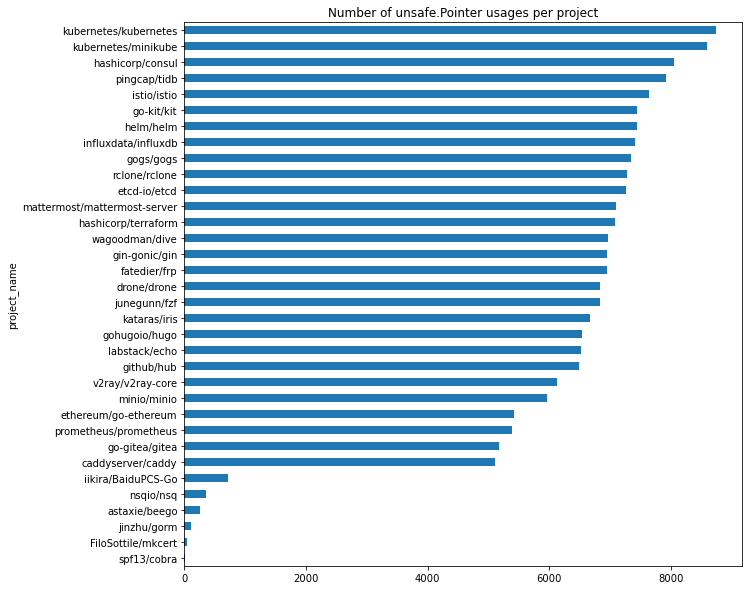

In [14]:
matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=True).plot.barh(title='Number of unsafe.Pointer usages per project', figsize=(10, 10))

Es scheint eine Art Schwelle zu geben: bis einschließlich caddyserver/caddy benutzen die Projekte mehrere Tausend unsafe Zeilen (alle zwischen 5000 und 9000), danach allerdings nur noch unter 1000,

## Anzahl von unsafe usages nach Modul

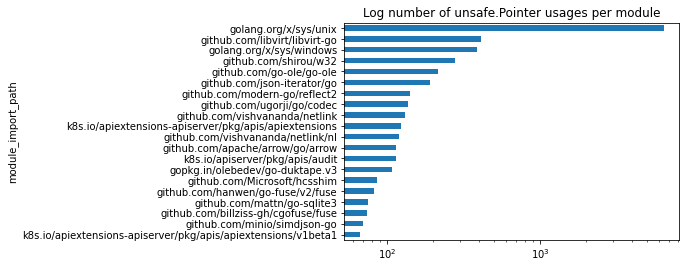

In [15]:
matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .groupby(['module_import_path', 'project_name'])['module_import_path'].count()\
    .groupby('module_import_path').max()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(logx=True, title='Log number of unsafe.Pointer usages per module')

In [16]:
matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .groupby(['module_import_path', 'project_name'])['module_import_path'].count()\
    .groupby('module_import_path').max()\
    .sort_values(ascending=False)[:15]

module_import_path
golang.org/x/sys/unix                                    6466
github.com/libvirt/libvirt-go                             412
golang.org/x/sys/windows                                  387
github.com/shirou/w32                                     279
github.com/go-ole/go-ole                                  216
github.com/json-iterator/go                               191
github.com/modern-go/reflect2                             142
github.com/ugorji/go/codec                                137
github.com/vishvananda/netlink                            131
k8s.io/apiextensions-apiserver/pkg/apis/apiextensions     124
github.com/vishvananda/netlink/nl                         119
github.com/apache/arrow/go/arrow                          115
k8s.io/apiserver/pkg/apis/audit                           114
gopkg.in/olebedev/go-duktape.v3                           107
github.com/Microsoft/hcsshim                               86
Name: module_import_path, dtype: int64

Wir sehen einen unglaublich großen Vorsprung des `sys` Packages, das durch sehr viele Wrapper-Calls um C-Library Funktionen kommt. Dieses Paket sollte bei Analysen vielleicht ausgenommen werden.

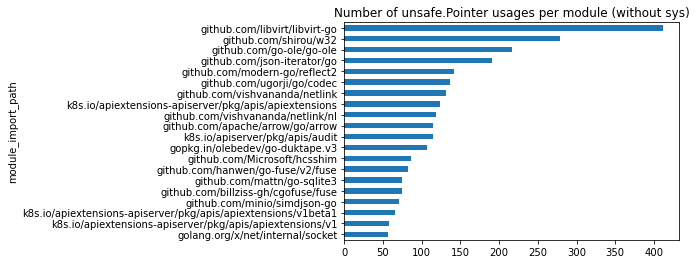

In [17]:
matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .where(matches_df['module_import_path']!='golang.org/x/sys/unix')\
    .where(matches_df['module_import_path']!='golang.org/x/sys/windows')\
    .groupby(['module_import_path', 'project_name'])['module_import_path'].count()\
    .groupby('module_import_path').max()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Number of unsafe.Pointer usages per module (without sys)')

## Anzahl von unsafe.Pointer usages pro Registry

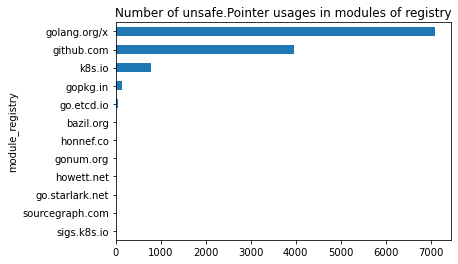

In [18]:
matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .groupby(['module_registry', 'module_import_path', 'project_name'])['module_registry'].count()\
    .groupby(['module_registry', 'module_import_path']).max()\
    .groupby('module_registry').sum()\
    .sort_values(ascending=True).plot.barh(title='Number of unsafe.Pointer usages in modules of registry')

In [19]:
matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .groupby(['module_registry', 'module_import_path', 'project_name'])['module_registry'].count()\
    .groupby(['module_registry', 'module_import_path']).max()\
    .groupby('module_registry').sum()\
    .sort_values(ascending=False)

module_registry
golang.org/x       7089
github.com         3968
k8s.io              773
gopkg.in            143
go.etcd.io           58
bazil.org            12
honnef.co             9
gonum.org             8
howett.net            2
go.starlark.net       2
sourcegraph.com       1
sigs.k8s.io           1
Name: module_registry, dtype: int64

Wir sehen eine riesige Häufung in der `golang.org/x` Registry, die allerdings nur durch das `sys` Package erzeugt wird.

## Unterschiedliche Anzahl von unsafe.Pointer usages in der gleichen Bibliothek

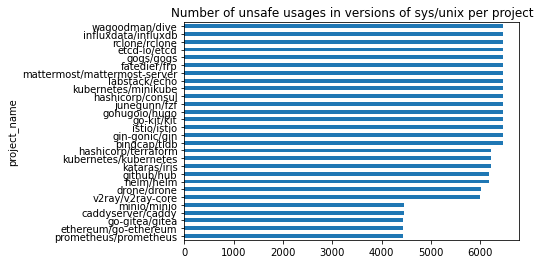

In [20]:
matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .where(matches_df['module_import_path']=='golang.org/x/sys/unix')\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=True).plot.barh(title='Number of unsafe usages in versions of sys/unix per project')

In [21]:
matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .where(matches_df['module_import_path']=='golang.org/x/sys/unix')\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=False)

project_name
wagoodman/dive                  6466
influxdata/influxdb             6466
rclone/rclone                   6466
etcd-io/etcd                    6466
gogs/gogs                       6466
fatedier/frp                    6466
mattermost/mattermost-server    6466
labstack/echo                   6466
kubernetes/minikube             6466
hashicorp/consul                6466
junegunn/fzf                    6466
gohugoio/hugo                   6462
go-kit/kit                      6462
istio/istio                     6460
gin-gonic/gin                   6460
pingcap/tidb                    6460
hashicorp/terraform             6216
kubernetes/kubernetes           6216
kataras/iris                    6216
github/hub                      6180
helm/helm                       6177
drone/drone                     6020
v2ray/v2ray-core                5990
minio/minio                     4451
caddyserver/caddy               4451
go-gitea/gitea                  4438
ethereum/go-ethereum     

Mögliche Gründe:

 - nicht alle Dateien des Moduls werden von `go mod vendor` kopiert, sondern nur die benötigten
 - es handelt sich um unterschiedliche Versionen von sys/unix

## Anzahl von unsafe.Pointer usages pro Datei

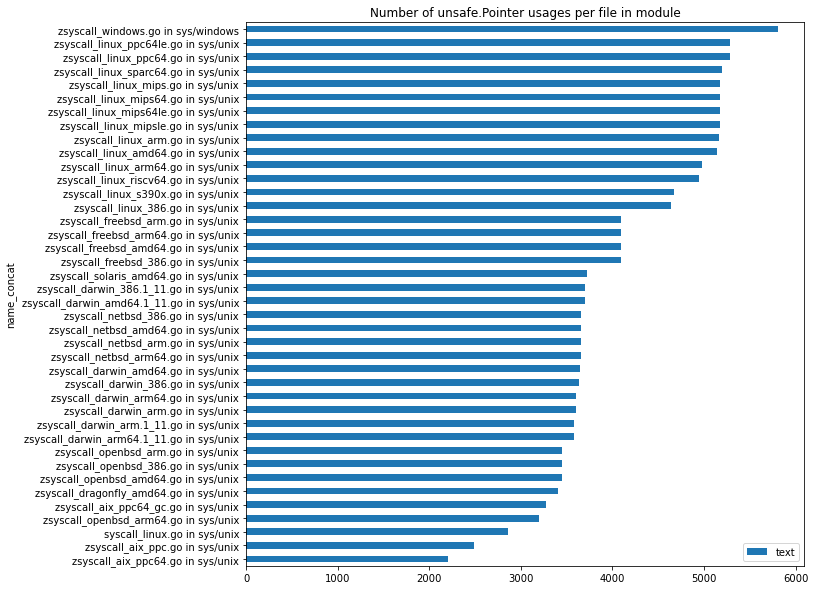

In [22]:
df = matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .groupby(['file_name', 'module_import_path', 'module_registry'], as_index=False)\
    ['text'].count()

df['name_concat'] = df.apply(lambda x: "{} in {}"\
                             .format(x['file_name'], x['module_import_path'][len(x['module_registry'])+1:]), \
                             axis=1)

df\
    .iloc[:,[4,3]]\
    .sort_values('text', ascending=True)[-40:]\
    .plot.barh(x='name_concat', title='Number of unsafe.Pointer usages per file in module', figsize=(10,10))

Der Plot ist natürlich wieder durch `sys` verzerrt, daher hier die Analyse ohne `sys`:

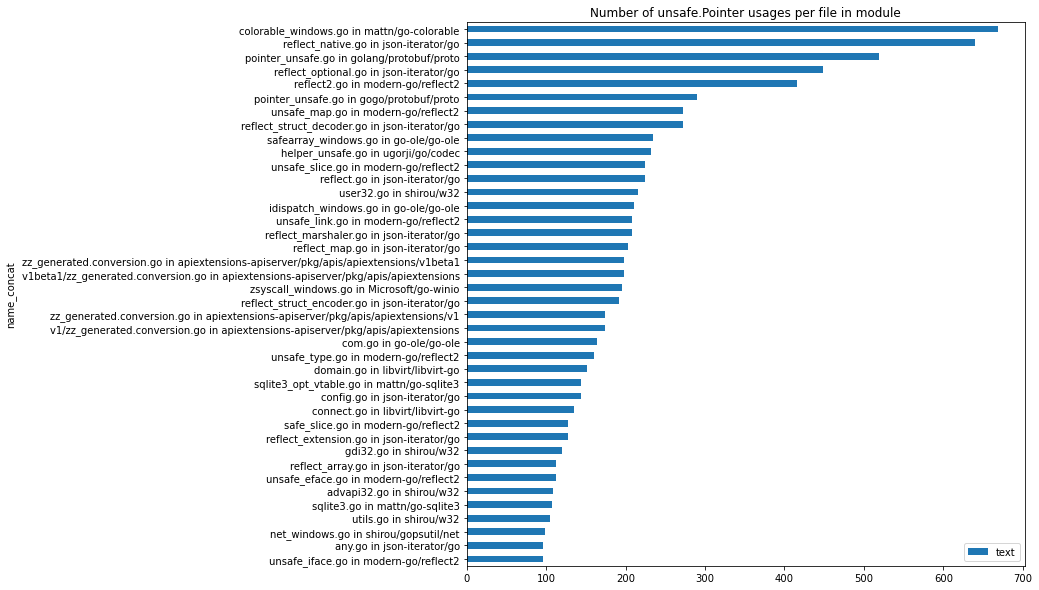

In [23]:
df = matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .where(matches_df['module_import_path']!='golang.org/x/sys/unix')\
    .where(matches_df['module_import_path']!='golang.org/x/sys/windows')\
    .groupby(['file_name', 'module_import_path', 'module_registry'], as_index=False)\
    ['text'].count()

df['name_concat'] = df.apply(lambda x: "{} in {}"\
                             .format(x['file_name'], x['module_import_path'][len(x['module_registry'])+1:]), \
                             axis=1)

df\
    .iloc[:,[4,3]]\
    .sort_values('text', ascending=True)[-40:]\
    .plot.barh(x='name_concat', title='Number of unsafe.Pointer usages per file in module', figsize=(10,10))

In [24]:
df = matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .where(matches_df['module_import_path']!='golang.org/x/sys/unix')\
    .where(matches_df['module_import_path']!='golang.org/x/sys/windows')\
    .groupby(['file_name', 'module_import_path', 'module_registry'], as_index=False)\
    ['text'].count()

df['name_concat'] = df.apply(lambda x: "{} in {}"\
                             .format(x['file_name'], x['module_import_path'][len(x['module_registry'])+1:]), \
                             axis=1)

df\
    .iloc[:,[4,3]]\
    .sort_values('text', ascending=True)[-20:]

,name_concat,text
753,zsyscall_windows.go in Microsoft/go-winio,196
702,v1beta1/zz_generated.conversion.go in apiexten...,198
766,zz_generated.conversion.go in apiextensions-ap...,198
473,reflect_map.go in json-iterator/go,203
474,reflect_marshaler.go in json-iterator/go,208
666,unsafe_link.go in modern-go/reflect2,208
211,idispatch_windows.go in go-ole/go-ole,210
675,user32.go in shirou/w32,216
465,reflect.go in json-iterator/go,224
670,unsafe_slice.go in modern-go/reflect2,224


## Wie oft werden Module importiert? (Beliebtheit)

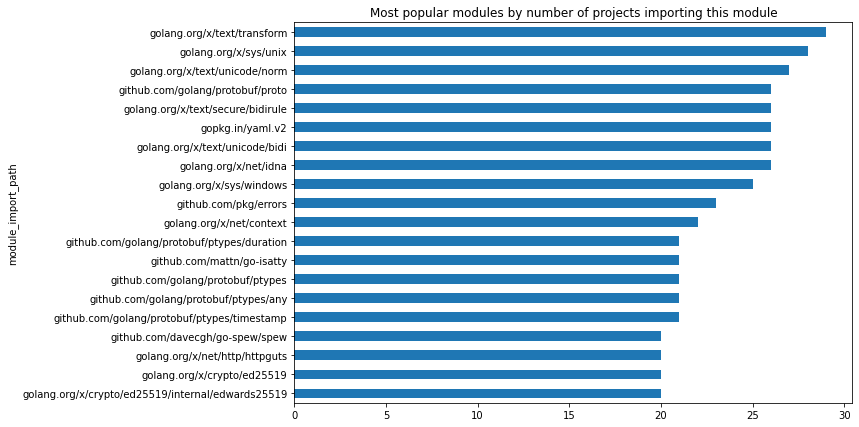

In [193]:
modules_df\
    .groupby('module_import_path')['module_import_path'].count()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Most popular modules by number of projects importing this module', figsize=(10,7))

## Wie viele Module importieren die Projekte jeweils?

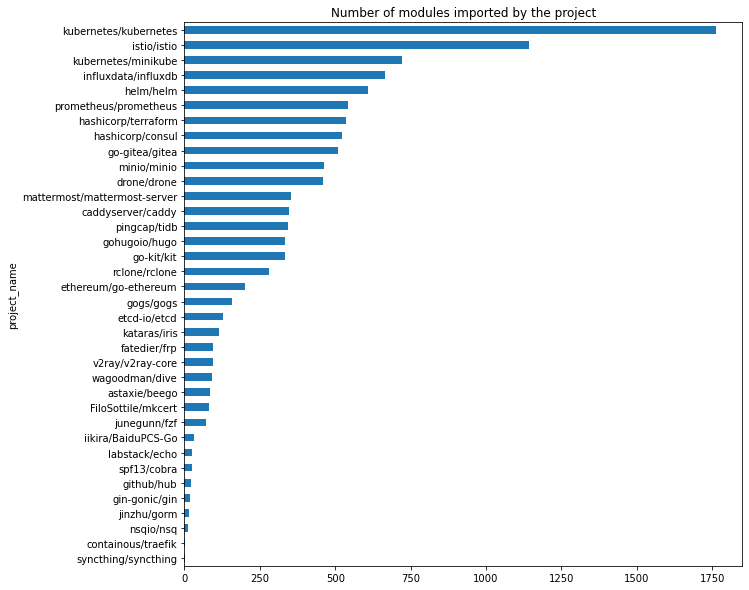

In [192]:
modules_df\
    .groupby(['project_name'])['project_name'].count()\
    .sort_values(ascending=True)\
    .plot.barh(title='Number of modules imported by the project', figsize=(10,10))

In [27]:
modules_df\
    .groupby(['project_name'])['project_name'].count()\
    .sort_values(ascending=False)

project_name
kubernetes/kubernetes           1762
istio/istio                     1141
kubernetes/minikube              720
influxdata/influxdb              664
helm/helm                        607
prometheus/prometheus            543
hashicorp/terraform              537
hashicorp/consul                 523
go-gitea/gitea                   509
minio/minio                      464
drone/drone                      459
mattermost/mattermost-server     353
caddyserver/caddy                345
pingcap/tidb                     344
gohugoio/hugo                    332
go-kit/kit                       332
rclone/rclone                    281
ethereum/go-ethereum             199
gogs/gogs                        156
etcd-io/etcd                     129
kataras/iris                     113
fatedier/frp                      96
v2ray/v2ray-core                  95
wagoodman/dive                    90
astaxie/beego                     86
FiloSottile/mkcert                82
junegunn/fzf             

## Prozentsatz von unsafe.Pointer nutzenden Modulen

In [209]:
total_modules_count = modules_df['module_import_path'].nunique()
unsafe_modules_count = matches_df['module_import_path'].nunique()

In [210]:
print("{} of {} modules ({:.1%}) have at least one unsafe usage."\
      .format(unsafe_modules_count, total_modules_count, unsafe_modules_count/total_modules_count))

424 of 4478 modules (9.5%) have at least one unsafe usage.


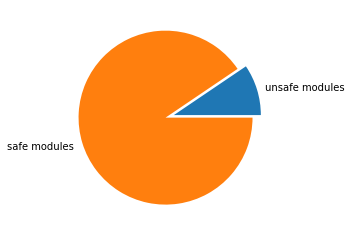

In [214]:
data = [unsafe_modules_count, total_modules_count - unsafe_modules_count]

plt.pie(data, labels=['unsafe modules', 'safe modules'], explode=(0, 0.1))

plt.show()

## Verteilung von unsafe auf verschiedene match types

In [28]:
matches_df\
    .groupby(['match_type', 'module_import_path', 'project_name'])['match_type'].count()\
    .groupby(['match_type', 'module_import_path']).max()\
    .groupby('match_type').sum()

match_type
reflect.SliceHeader       200
reflect.StringHeader       46
uintptr                 12660
unsafe.Alignof              1
unsafe.Offsetof            56
unsafe.Pointer          12066
unsafe.Sizeof             524
Name: match_type, dtype: int64

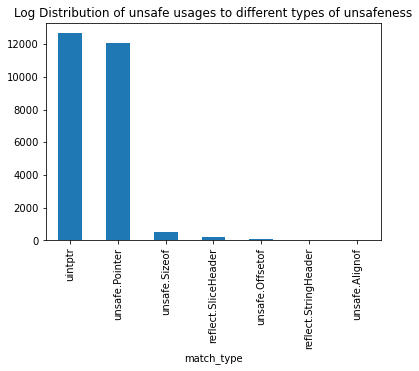

In [29]:
matches_df\
    .groupby(['match_type', 'module_import_path', 'project_name'])['match_type'].count()\
    .groupby(['match_type', 'module_import_path']).max()\
    .groupby('match_type').sum()\
    .sort_values(ascending=False)\
    .plot.bar(logy=False, title='Log Distribution of unsafe usages to different types of unsafeness')

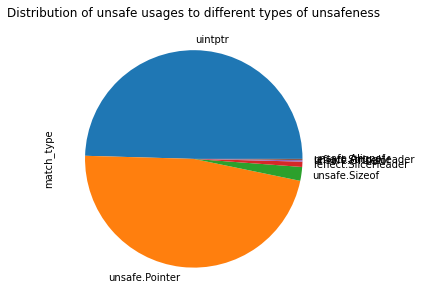

In [30]:
matches_df\
    .groupby(['match_type', 'module_import_path', 'project_name'])['match_type'].count()\
    .groupby(['match_type', 'module_import_path']).max()\
    .groupby('match_type').sum()\
    .sort_values(ascending=False)\
    .plot.pie(title='Distribution of unsafe usages to different types of unsafeness', figsize=(10, 5))

In [31]:
matches_df\
    .groupby(['match_type', 'module_import_path', 'project_name'])['match_type'].count()\
    .groupby(['match_type', 'module_import_path']).max()\
    .groupby('match_type').sum()\
    .sort_values(ascending=False)

match_type
uintptr                 12660
unsafe.Pointer          12066
unsafe.Sizeof             524
reflect.SliceHeader       200
unsafe.Offsetof            56
reflect.StringHeader       46
unsafe.Alignof              1
Name: match_type, dtype: int64

unsafe.Pointer und uintprt dominieren klar. Vermutlich werden sie fast immer gemeinsam genutzt. Die anderen Typen sind im Vergleich extrem selten. Genau das könnte aber bedeuten, dass es Sinn macht sich diese manuell anzuschauen!

## Gleichzeitige Verwendung von uintptr und unsafe.Pointer

In [165]:
df1 = matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer').dropna()\
    .drop_duplicates(subset=['module_import_path', 'file_name', 'line_number'])

df2 = matches_df\
    .where(matches_df['match_type']=='uintptr').dropna()\
    .drop_duplicates(subset=['module_import_path', 'file_name', 'line_number'])

mdf = pd.merge(df1, df2, how='outer', on=['module_import_path', 'file_name', 'line_number'])\
    .loc[:,['module_import_path', 'file_name', 'line_number', 'text_x', 'context_x', 'text_y', 'context_y', 
            'match_type_x', 'match_type_y']]

simultaneous_usages_df = mdf.dropna()
uintptr_without_unsafePointer_df = mdf.loc[mdf['match_type_x'].isnull()]
unsafePointer_without_uintptr_df = mdf.loc[mdf['match_type_y'].isnull()]

In [166]:
print("Number of unsafe.Pointer lines: {}".format(df1['line_number'].count()))
print("Number of uintptr lines: {}".format(df2['line_number'].count()))
print()
print("Number of simultaneous usages: {}".format(simultaneous_usages_df['line_number'].count()))
print("unsafe.Pointer used without uintptr: {}".format(unsafePointer_without_uintptr_df['line_number'].count()))
print("uintptr used without unsafe.Pointer: {}".format(uintptr_without_unsafePointer_df['line_number'].count()))

Number of unsafe.Pointer lines: 27447
Number of uintptr lines: 27950

Number of simultaneous usages: 15187
unsafe.Pointer used without uintptr: 12260
uintptr used without unsafe.Pointer: 12763


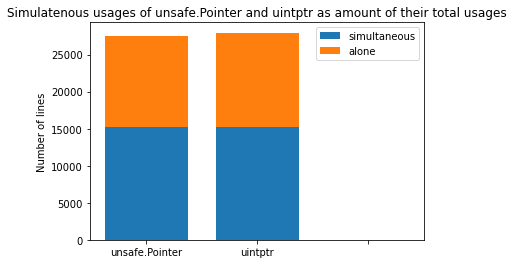

In [167]:
together_data = [simultaneous_usages_df['line_number'].count(), simultaneous_usages_df['line_number'].count(), 0]
alone_data = [unsafePointer_without_uintptr_df['line_number'].count(), 
              uintptr_without_unsafePointer_df['line_number'].count(), 0]
idx = np.arange(3)/3

p1 = plt.bar(idx, together_data, width=0.25)
p2 = plt.bar(idx, alone_data, width, bottom=together_data)

plt.ylabel('Number of lines')
plt.xticks(idx, ['unsafe.Pointer', 'uintptr', ''])
plt.legend((p1[0], p2[0]), ('simultaneous', 'alone'), loc='upper right')
plt.title('Simulatenous usages of unsafe.Pointer and uintptr as amount of their total usages')

plt.show()

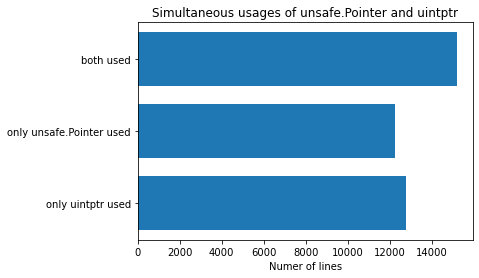

In [168]:
data = [uintptr_without_unsafePointer_df['line_number'].count(),
        unsafePointer_without_uintptr_df['line_number'].count(),
        simultaneous_usages_df['line_number'].count()]
idx = np.arange(3)/3
width = 0.25

plt.barh(idx, data, width)
plt.xlabel('Numer of lines')
plt.yticks(idx, ['only uintptr used', 'only unsafe.Pointer used', 'both used'])
plt.title('Simultaneous usages of unsafe.Pointer and uintptr')

plt.show()

In [169]:
print("simultaneous:")
print(simultaneous_usages_df['text_x'][10])

print("only unsafe.Pointer:")
print(unsafePointer_without_uintptr_df['text_x'].iloc[10])

print("only uintptr:")
print(uintptr_without_unsafePointer_df['text_y'].iloc[10])

simultaneous:
	err := checkError(getConsoleScreenBufferInfoProc.Call(handle, uintptr(unsafe.Pointer(&info)), 0))

only unsafe.Pointer:
	return newPtr(unsafe.Pointer(&buf[0])), buf

only uintptr:
	r1, r2, err := setConsoleTextAttributeProc.Call(handle, uintptr(attribute), 0)



## Vet Ergebnisse pro Projekt

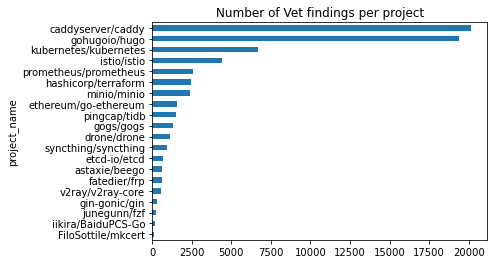

In [36]:
vet_df\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=True)\
    .plot.barh(title='Number of Vet findings per project')

In [37]:
vet_df\
    .groupby('project_name')['project_name'].count()\
    .sort_values(ascending=False)

project_name
caddyserver/caddy        20150
gohugoio/hugo            19407
kubernetes/kubernetes     6706
istio/istio               4379
prometheus/prometheus     2553
hashicorp/terraform       2470
minio/minio               2406
ethereum/go-ethereum      1569
pingcap/tidb              1522
gogs/gogs                 1316
drone/drone               1105
syncthing/syncthing        908
etcd-io/etcd               681
astaxie/beego              600
fatedier/frp               594
v2ray/v2ray-core           561
gin-gonic/gin              294
junegunn/fzf               231
iikira/BaiduPCS-Go         176
FiloSottile/mkcert         133
Name: project_name, dtype: int64

## Vet Ergebnisse pro Modul

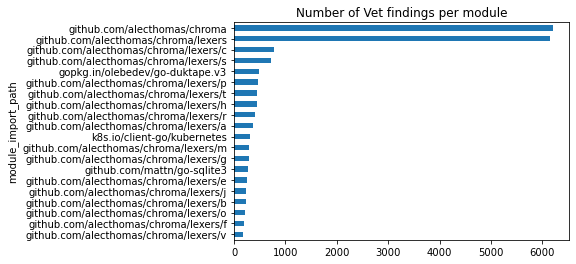

In [38]:
vet_df\
    .groupby(['module_import_path', 'project_name'])['module_import_path'].count()\
    .groupby('module_import_path').max()\
    .sort_values(ascending=True)[-20:]\
    .plot.barh(title='Number of Vet findings per module')

In [39]:
vet_df\
    .groupby(['module_import_path', 'project_name'])['module_import_path'].count()\
    .groupby('module_import_path').max()\
    .sort_values(ascending=False)[:20]

module_import_path
github.com/alecthomas/chroma             6206
github.com/alecthomas/chroma/lexers      6158
github.com/alecthomas/chroma/lexers/c     779
github.com/alecthomas/chroma/lexers/s     712
gopkg.in/olebedev/go-duktape.v3           475
github.com/alecthomas/chroma/lexers/p     468
github.com/alecthomas/chroma/lexers/t     449
github.com/alecthomas/chroma/lexers/h     440
github.com/alecthomas/chroma/lexers/r     408
github.com/alecthomas/chroma/lexers/a     369
k8s.io/client-go/kubernetes               311
github.com/alecthomas/chroma/lexers/m     288
github.com/alecthomas/chroma/lexers/g     287
github.com/mattn/go-sqlite3               267
github.com/alecthomas/chroma/lexers/e     250
github.com/alecthomas/chroma/lexers/j     239
github.com/alecthomas/chroma/lexers/b     227
github.com/alecthomas/chroma/lexers/o     221
github.com/alecthomas/chroma/lexers/f     201
github.com/alecthomas/chroma/lexers/v     182
Name: module_import_path, dtype: int64

## Vet Ergebnisse im Zusammenhang mit unsafe

In [180]:
df1 = matches_df\
    .drop_duplicates(subset=['module_import_path', 'file_name', 'line_number'])

df2 = vet_df\
    .drop_duplicates(subset=['module_import_path', 'file_name', 'line_number'])

mdf = pd.merge(df1, df2, how='outer', on=['module_import_path', 'file_name', 'line_number'])\
    .loc[:,['module_import_path', 'file_name', 'line_number', 'text', 'context', 'match_type', 'message']]

vet_and_unsafe_df = mdf.dropna()
only_vet_df = mdf.loc[mdf['text'].isnull()]
only_unsafe_df = mdf.loc[mdf['message'].isnull()]

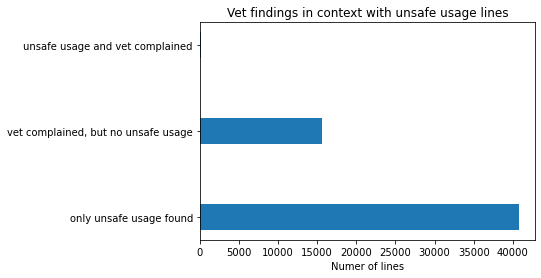

In [191]:
data = [only_unsafe_df['line_number'].count(),
        only_vet_df['line_number'].count(),
        vet_and_unsafe_df['line_number'].count()]
idx = np.arange(3)/3
width = 0.1

plt.barh(idx, data, width)
plt.xlabel('Numer of lines')
plt.yticks(idx, ['only unsafe usage found', 'vet complained, but no unsafe usage', 'unsafe usage and vet complained'])
plt.title('Vet findings in context with unsafe usage lines')

plt.show()

## Anzahl unsafe.Pointer usages, die von Vet erkannt wurden

In [186]:
df1 = matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .drop_duplicates(subset=['module_import_path', 'file_name', 'line_number'])

df2 = vet_df\
    .drop_duplicates(subset=['module_import_path', 'file_name', 'line_number'])

vet_unsafePointer_df = pd.merge(df1, df2, how='outer', on=['module_import_path', 'file_name', 'line_number'])\
    .dropna()\
    .loc[:,['module_import_path', 'file_name', 'line_number', 'text', 'context', 'match_type', 'message']]

In [188]:
print("Number of lines with unsafe.Pointer usage that were flagged by vet: {}"\
      .format(vet_unsafePointer_df['message'].count()))
print()
print("Vet messages on these lines:")
print(vet_unsafePointer_df['message'].sort_values())

Number of lines with unsafe.Pointer usage that were flagged by vet: 48

Vet messages on these lines:
20222     SYS___SYSCTL not declared by package syscall
19767     SYS___SYSCTL not declared by package syscall
20225     SYS___SYSCTL not declared by package syscall
489      UTF16ToString not declared by package syscall
616      UTF16ToString not declared by package syscall
16782                         undeclared name: Cmsghdr
12348                         undeclared name: Cmsghdr
6286                          undeclared name: Cmsghdr
22119                           undeclared name: Errno
219                          undeclared name: Iterator
16626                          undeclared name: PollFd
14574                          undeclared name: PollFd
15227                          undeclared name: PollFd
14969                          undeclared name: PollFd
15500                          undeclared name: PollFd
15872                          undeclared name: PollFd
16082              

Wir sehen, dass hier in keinem Fall eine Ausgabe des `-unsafeptr` Checks von Vet vorliegt. Es gibt lediglich Nachrichten, die bemängeln, dass ein Identifier nicht deklariert wurde (`undeclared name` und `not declared by package`

## Verteilung unsafe.Pointer usage auf Stars/Forks/LastPushAge

In [243]:
df1 = matches_df\
    .where(matches_df['match_type']=='unsafe.Pointer')\
    .dropna()

df2 = projects_df

mdf = pd.merge(df1, df2, how='left', on=['project_name'])

fields = ['project_name', 'project_number_of_stars', 'project_number_of_forks', 'project_created_at',\
          'project_last_pushed_at']

unsafe_by_project_features_df = mdf\
    .loc[:,fields+['line_number']]\
    .groupby(fields).count().reset_index()

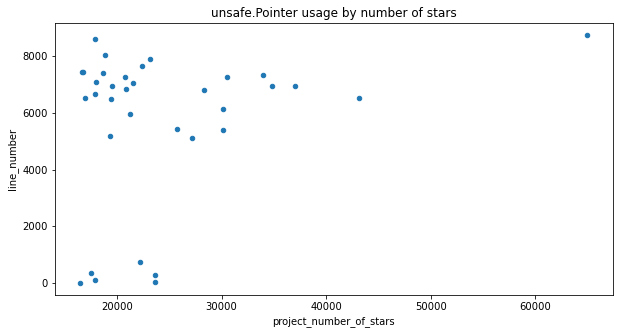

In [255]:
unsafe_by_project_features_df\
    .plot.scatter(x='project_number_of_stars', y='line_number', 
                  title='unsafe.Pointer usage by number of stars', 
                  figsize=(10,5))

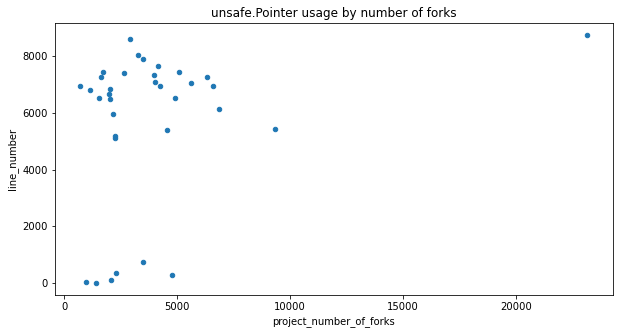

In [254]:
unsafe_by_project_features_df\
    .plot.scatter(x='project_number_of_forks', y='line_number', 
                  title='unsafe.Pointer usage by number of forks', 
                  figsize=(10,5))

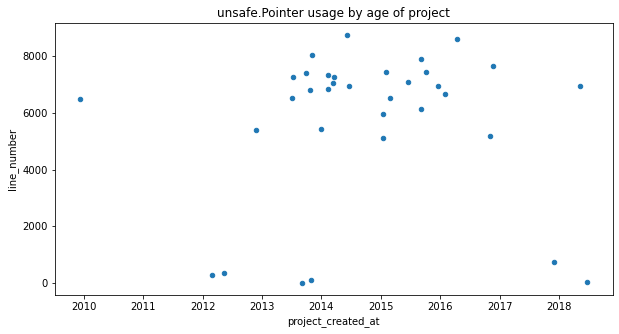

In [252]:
unsafe_by_project_features_df\
    .plot.scatter(x='project_created_at', y='line_number', 
                  title='unsafe.Pointer usage by age of project', 
                  figsize=(10,5))

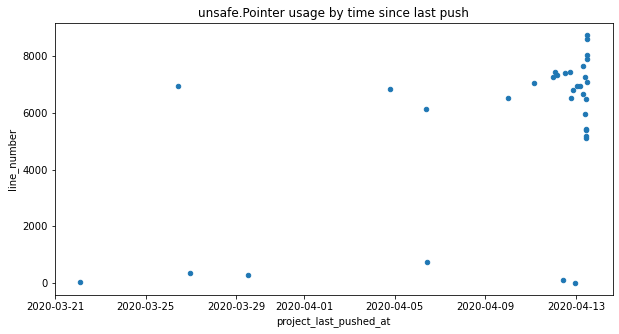

In [250]:
unsafe_by_project_features_df\
    .plot.scatter(x='project_last_pushed_at', y='line_number', 
                  title='unsafe.Pointer usage by time since last push',
                  figsize=(10,5))

## unsafe.Pointer usage pro Modul, gewichtet nach Modulbeliebtheit

## Top 50 unsafe.Pointer usages

## Scratch Space

In [40]:
"Hi"

'Hi'